### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [4]:
# Using this code to view charecteristics of each column.

for column in data.columns:
    print(f"{column}: {data[column].unique()}")

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
"""
Add actual_age column
1. Convert all ages to int
2. Converts 50plus to some random number between 50 and 70
3. Converts below21 to some random number between 10 and 21
"""

def convert_age(age: str) -> int:
    """
    Function to convert
    1. All ages to int
    2. Converts 50plus to some random number between 50 and 70
    3. Converts below21 to some random number between 10 and 21
    """
    try:
        if "below" in age:
            return random.randrange(10, 21)
        elif "plus" in age:
            return random.randrange(50, 70)
        else:
            return int(age)
    except TypeError:
        # Handling this case just in case if we try to apply this method
        # multiple times.
        return age

data['actual_age'] = data.age.apply(convert_age)

In [6]:
"""
Adding actual_income column
1. Convert all income to int
2. Converts income ranges to a random integer within given range
"""

def convert_income(income: str) -> int:
    """
    Function to convert income ranges to a int within given range
    """
    try:
        if "-" in income:
            return random.randrange(
                int(income.split("-")[0].strip().lstrip("$")),
                int(income.split("-")[1].strip().lstrip("$"))
            )
        elif "More" in income:
            return random.randrange(
                int(income.rstrip(" or More").lstrip("$")),
                int(income.rstrip(" or More").lstrip("$")) + 20000)
        elif "Less" in income:
            return random.randrange(1000, int(income.lstrip("Less than $")))
    except TypeError:
        return income
        

data['actual_income'] = data.income.apply(convert_income)

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
count = data.groupby('Y')['Y'].agg(['count'])
accept_percentage = count.iloc[1]['count'] / data.shape[0] * 100
print(f"{accept_percentage:.2f}% of coupons were accepted!")

56.84% of coupons were accepted!


5. Use a bar plot to visualize the `coupon` column.

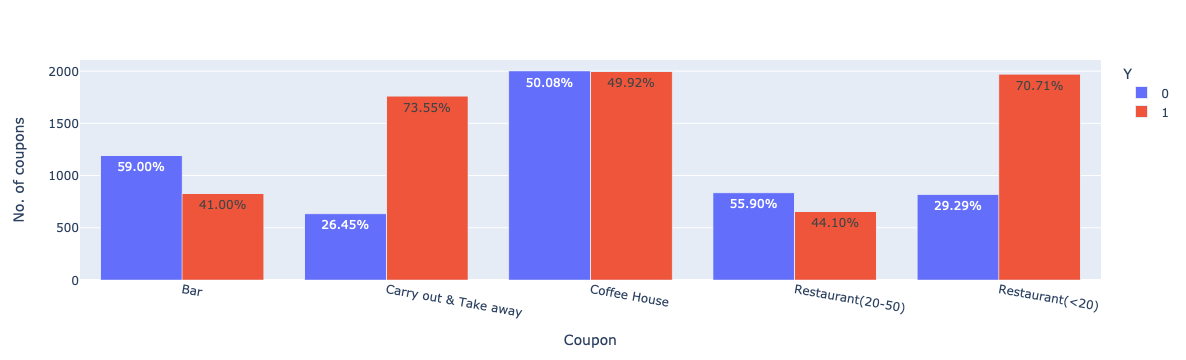

In [8]:
"""
This is generic function written to generate Group Bar plot.
Reused throughout this project!
"""
def plot_bar_column(column: str, df: pd.DataFrame, title: str = ""):
    """
    Function to plot bar graph based on given categorical column and
    dataframe
    column : Categorical column to plot coupon acceptance rate for
    df : Dataframe
    title : Plotly Bar plots title
    returns Plotly figure.
    """
    new_data = df.groupby(by=["Y", column]).size().reset_index(name="counts")
    # Adding percentage column
    df_total_0 = new_data.groupby([column]).agg(
        {"counts": "sum", "Y": "first"}).reset_index()
    df_total_1 = new_data.groupby([column]).agg(
        {"counts": "sum", "Y": "last"}).reset_index()
    df_total = pd.merge(df_total_0, df_total_1, how='outer')
    new_data['Y'] = new_data['Y'].astype('str')
    new_data['percentage'] = new_data['counts'] / df_total['counts'] * 100
    fig = px.bar(
        data_frame=new_data,
        x=column,
        y="counts",
        color="Y",
        barmode="group",
        text=new_data['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
        labels={
            column: column.title(),
            "counts": "No. of coupons"
        },
        title=title
    )
    fig.update_xaxes(tickangle=10)
    return fig

plot_bar_column("coupon", data).show()

Acceptance rate is high for Carry out & Take away and Restaurant(<20) coupons!

6. Use a histogram to visualize the temperature column.

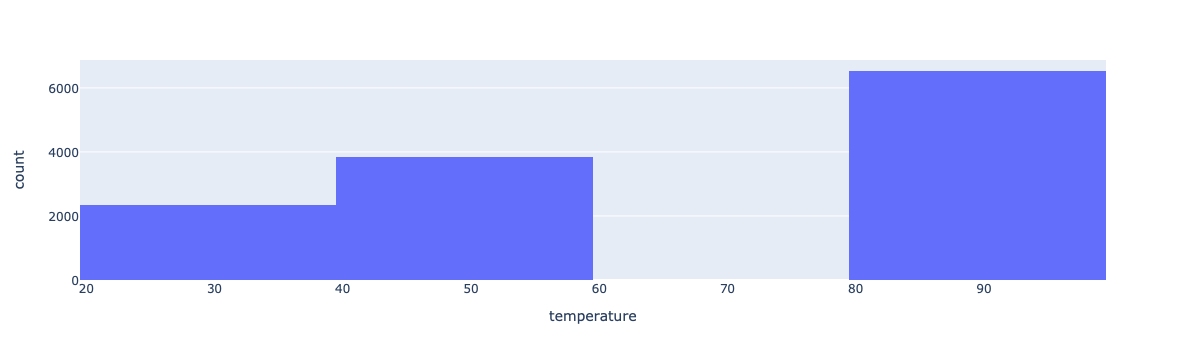

In [9]:
fig = px.histogram(data, x="temperature")
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_data = data[data['coupon'] == 'Bar']
bar_data

destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  RestaurantLessThan20  \
9             1d  Female  21  Unmarried partner  ...                   4~8   
13            1d  Female  21  Unmarried partner  ...                   4~8   
17            1d  Female  21  Unmarried partner  ...                   4~8   
24            1d    Male  21             Single  ...                   4~8   
35            1d    Male  21             Single  ...                   4~8   
...          ...     ...  ..                ...  ...                   ...   
12663         1d    Male  26             Single  ...                   4~8   
12664         2h    Male  26             Single  ...                   4~8   
12667         1d    Male  26             Single  ...                   4~8   
12670         2h    Male  26             Single  ...                   4~8   
12682         1d    Male  26             Single  ...                   4~8   

      Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min  \
9                  1~3                1                 1                 0   
13                 1~3                1                 0                 0   
17                 1~3                1                 1                 1   
24               less1                1                 0                 0   
35               less1                1                 0                 0   
...                ...              ...               ...               ...   
12663              1~3                1                 1                 0   
12664              1~3                1                 1                 0   
12667              1~3                1                 1                 0   
12670              1~3                1                 1                 0   
12682              1~3                1                 1                 1   

      direction_same direction_opp  Y actual_age actual_income  
9                  0             1  0         21         37699  
13                 1             0  1         21         37965  
17                 0             1  0         21         42770  
24                 0             1  1         21         67012  
35                 1             0  1         21         64572  
...              ...           ... ..        ...           ...  
12663              0             1  0         26         78592  
12664              0             1  0         26         79881  
12667              0             1  0         26         78556  
12670              0             1  0         26         86794  
12682              0             1  0         26         86172  

[2017 rows x 28 columns]

2. What proportion of bar coupons were accepted?


In [11]:
count = bar_data.groupby('Y')['Y'].agg(['count'])
accept_percentage = (count.iloc[1]['count']
                     / (count.iloc[1]['count'] + count.iloc[0]['count'])
                     * 100)
print(f"{accept_percentage:.2f}% of Bar coupons were accepted!")

41.00% of Bar coupons were accepted!


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
# Removing the data points with Nan values!
bar_data_nonan = bar_data[bar_data['Bar'].notna()]
less_than_3 = [
    'never',
    'less1',
    '1~3'
]
more_than_4 = [
    '4~8',
    'gt8'
]
# Filtering with Bar less than 3 or fewer times
bar_less_than_3 = bar_data_nonan.query(
    "Bar in @less_than_3").groupby('Y')['Y'].agg(['count'])

# Filtering with Bar 4 or more times
bar_more_than_4 = bar_data_nonan.query(
    "Bar in @more_than_4").groupby('Y')['Y'].agg(['count'])

accept_percentage_3 = (
    bar_less_than_3.iloc[1]['count']
    / (bar_less_than_3.iloc[1]['count'] + bar_less_than_3.iloc[0]['count'])
    * 100
)

accept_percentage_4 = (
    bar_more_than_4.iloc[1]['count']
    / (bar_more_than_4.iloc[1]['count'] + bar_more_than_4.iloc[0]['count'])
    * 100
)

print(f"{accept_percentage_3:.2f}% of those who went "
      "to Bar 3 or fewer times accepted the coupon!")

print(f"{accept_percentage_4:.2f}% of those who went "
      "to Bar 4 or more times accepted the coupon!")

37.06% of those who went to Bar 3 or fewer times accepted the coupon!
76.88% of those who went to Bar 4 or more times accepted the coupon!


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
bar_filter = [
    '1~3',
    '4~8',
    'gt8'
]
bar_filter_age = bar_data_nonan.query(
    "Bar in @bar_filter and actual_age >= 25"
).groupby('Y')['Y'].agg(['count'])

bar_filter_age_percent = (
    bar_filter_age.iloc[1]['count']
    / (bar_filter_age.iloc[1]['count'] + bar_filter_age.iloc[0]['count'])
    * 100
)

print(f"{bar_filter_age_percent:.2f}% of those who went to Bar "
      "atleast once a month and are over age 25 accepted coupon "
)

69.52% of those who went to Bar atleast once a month and are over age 25 accepted coupon 


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
bar_filter = [
    '1~3',
    '4~8',
    'gt8'
]
bar_filter_data = bar_data_nonan.query(
    "Bar in @bar_filter and passanger != 'Kid(s)' "
    "and occupation != 'Farming Fishing & Forestry'"
).groupby('Y')['Y'].agg(['count'])

bar_filter_percent = (
    bar_filter_data.iloc[1]['count']
    / (bar_filter_data.iloc[1]['count'] + bar_filter_data.iloc[0]['count'])
    * 100
)

print(f"{bar_filter_percent:.2f}% of drivers who go to bars more "
      "than once a month and had passengers that were not a kid "
      "and had occupations other than farming, fishing, "
      "or forestry accepted coupons!")

71.32% of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted coupons!


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [15]:
# 6A
bar_filter = [
    '1~3',
    '4~8',
    'gt8'
]
bar_filter_data = (
    bar_data_nonan.query(
        "Bar in @bar_filter and passanger != 'Kid(s)' "
        "and maritalStatus != 'Widowed'"
    ).groupby('Y')['Y'].agg(['count'])
)

bar_filter_percent = (
    bar_filter_data.iloc[1]['count']
    / (bar_filter_data.iloc[1]['count'] + bar_filter_data.iloc[0]['count'])
    * 100
)

print(f"6A: {bar_filter_percent:.2f}% of who go to bars more "
      "than once a month, had passengers that were not a kid, "
      "and were not widowed Accepted the coupon!"
)

# 6B
bar_filter_data = (
    bar_data_nonan.query(
        "Bar in @bar_filter and actual_age <= 30"
    ).groupby('Y')['Y'].agg(['count'])
)

bar_filter_percent = (
    bar_filter_data.iloc[1]['count']
    / (bar_filter_data.iloc[1]['count'] + bar_filter_data.iloc[0]['count'])
    * 100
)

print(f"6B: {bar_filter_percent:.2f}% of who go to bars more "
      "than once a month and are under the age of 30 Accepted the coupon!")

# 6C
restaurant_filter = [
    '4~8',
    'gt8'
]
restaurant_filter_data = (
    bar_data_nonan.query(
        "RestaurantLessThan20 in @restaurant_filter and actual_income <= 50000"
    ).groupby('Y')['Y'].agg(['count'])
)
restaurant_filter_percent = (
    restaurant_filter_data.iloc[1]['count']
    / (restaurant_filter_data.iloc[1]['count']
       + restaurant_filter_data.iloc[0]['count']) * 100
)
print(f"6C: {restaurant_filter_percent:.2f}% of go to cheap restaurants "
      "more than 4 times a month and income is less than "
      "50K Accepted the coupon!")


6A: 71.32% of who go to bars more than once a month, had passengers that were not a kid, and were not widowed Accepted the coupon!
6B: 72.17% of who go to bars more than once a month and are under the age of 30 Accepted the coupon!
6C: 45.72% of go to cheap restaurants more than 4 times a month and income is less than 50K Accepted the coupon!


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Below are my observations after performing this analysis

* 41% of all Bar coupons were Accepted. Lower among the other coupon types.
* Bar coupons Acceptance rate(~76%) is higher for drivers who goto Bar more than 4 times a month when compared others who go less.
* Bar coupons Acceptance rate(~70%) for those who go bar atleast once a month and are atleast 25 years old.
* 71.32% of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted coupons!
* Drivers who goto cheap restaurants have lower Bar coupon Acceptance rate.
* 71.32% of who go to bars more than once a month, had passengers that were not a kid, and were not widowed Accepted the coupon.
* 72.17% of who go to bars more than once a month and are under the age of 30 Accepted the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Analysis for Restaurant(<20), Coffee House, Carry out & Take away & Restaurant(20-50) coupons.

Here i have tried to analyse the Restaurant(<20), Coffee House, Carry out & Take away & Restaurant(20-50) coupons and see what factors could increase the coupon acceptance rate.

Note: Bar coupons are skipped as its already explored in last section.

#### Bar plots with various categories showing coupon Acceptance rate.

I have considered below categories but similar analysis can be applied for other categories.
* destination
* passanger
* weather
* temperature
* time
* expiration
* gender
* maritalStatus
* RestaurantLessThan20
* age

All attributes are categorical, so let's look at discreet distributions of various variables with the target variable.

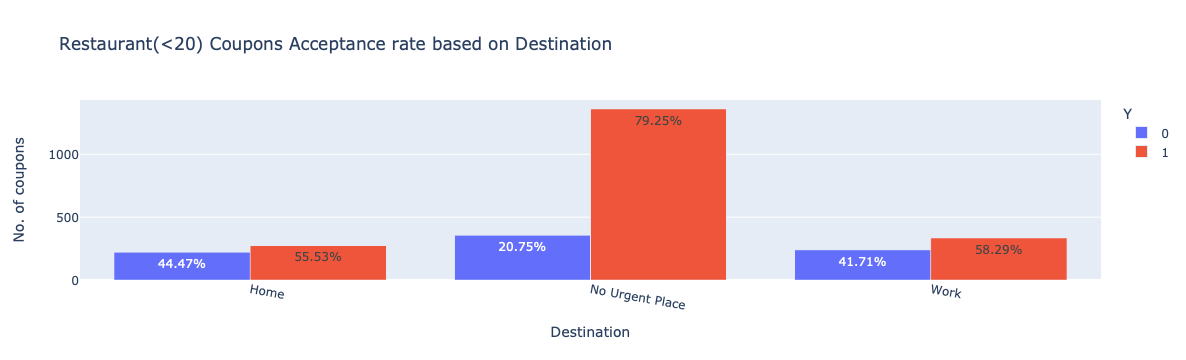

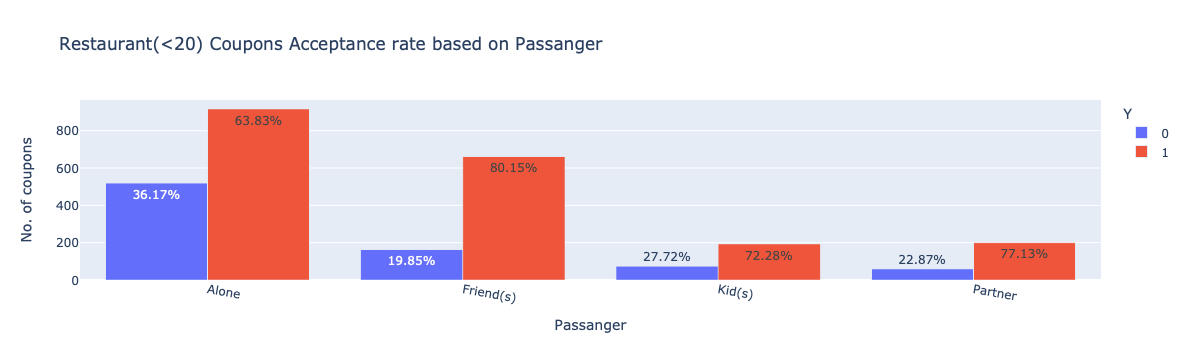

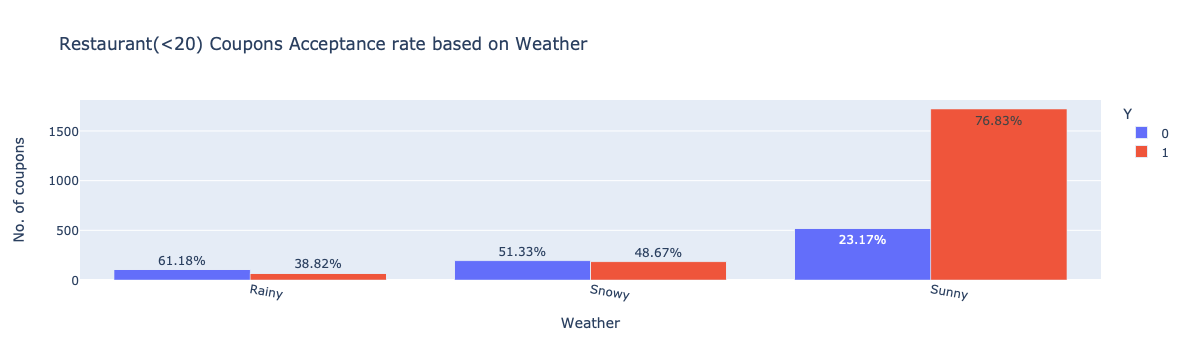

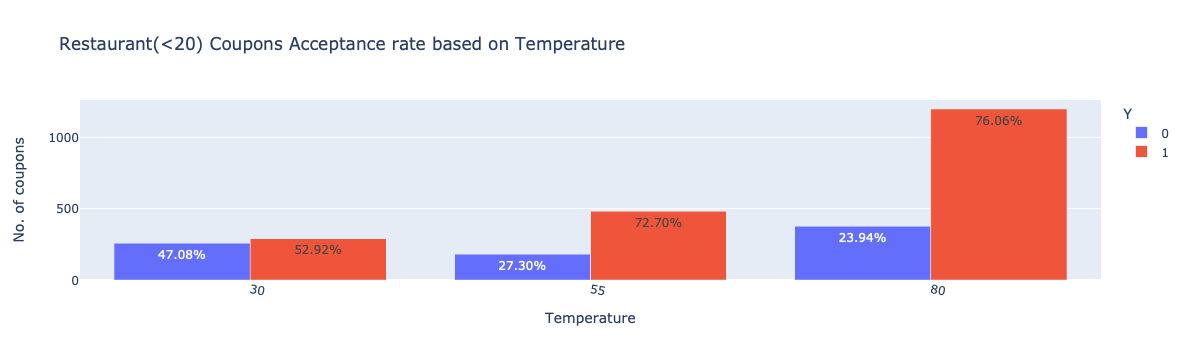

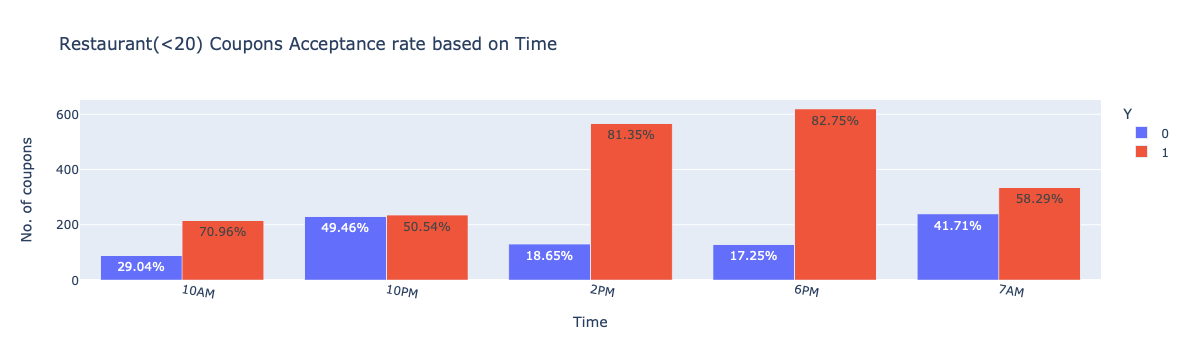

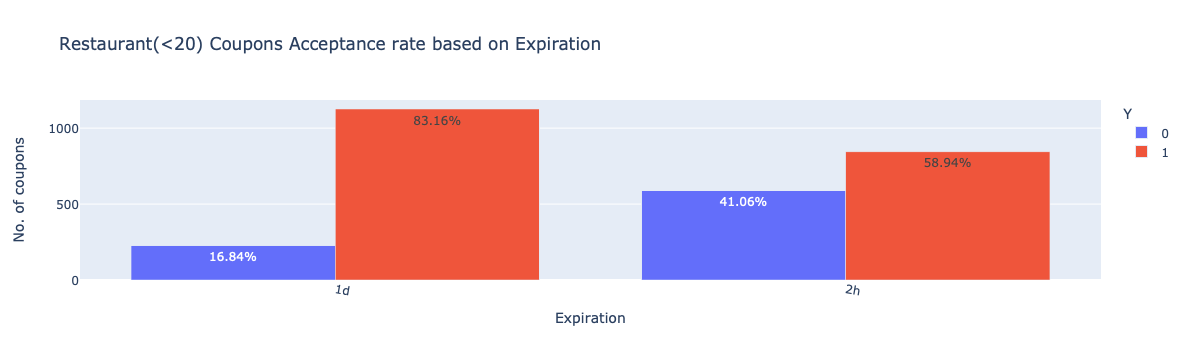

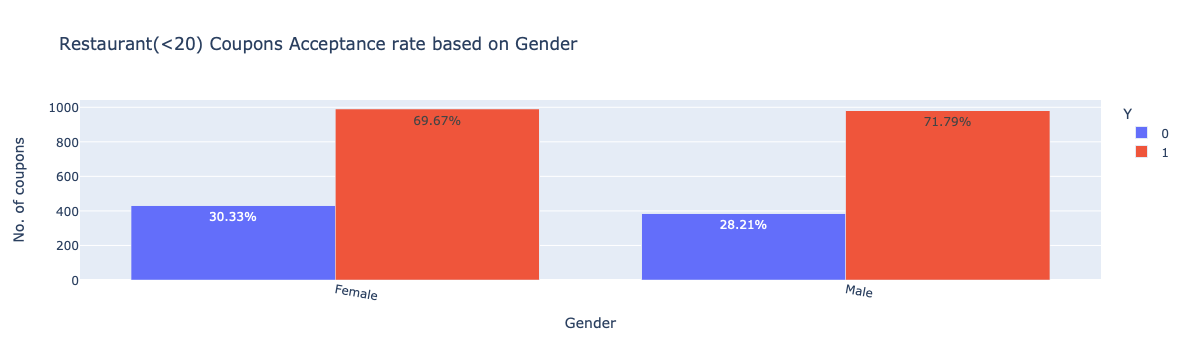

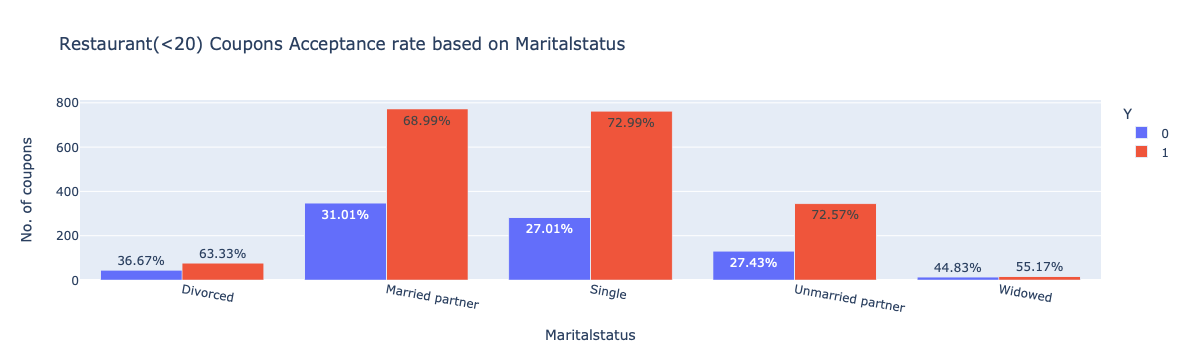

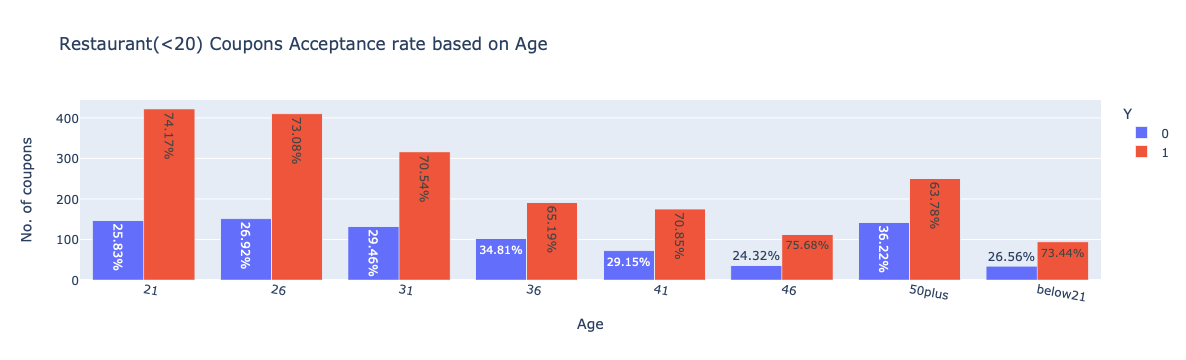

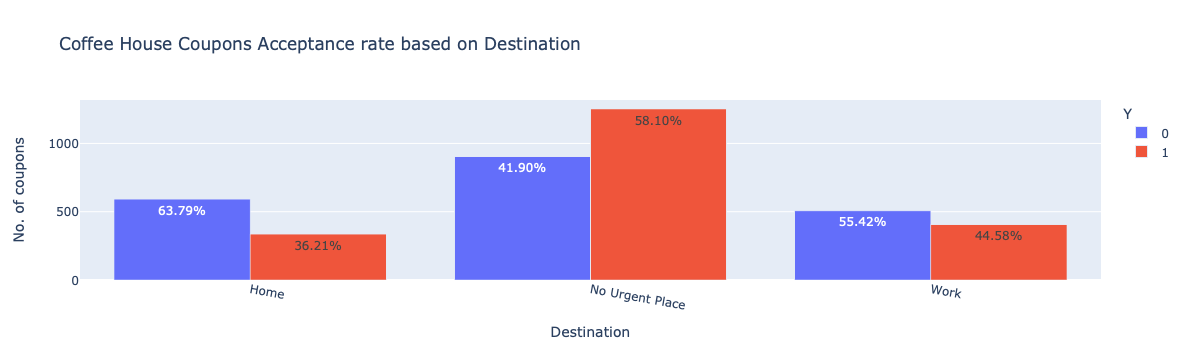

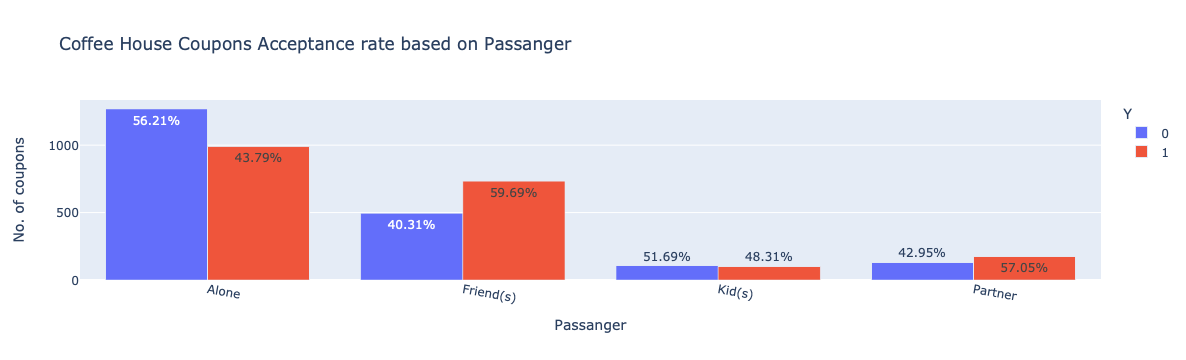

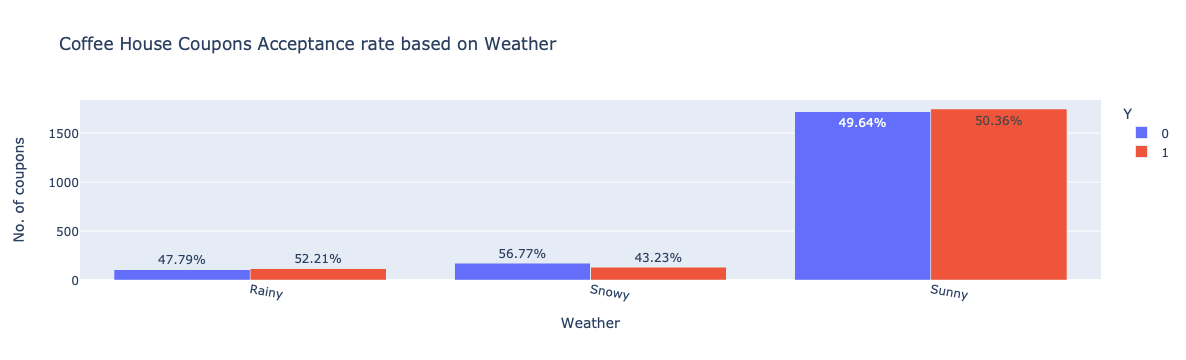

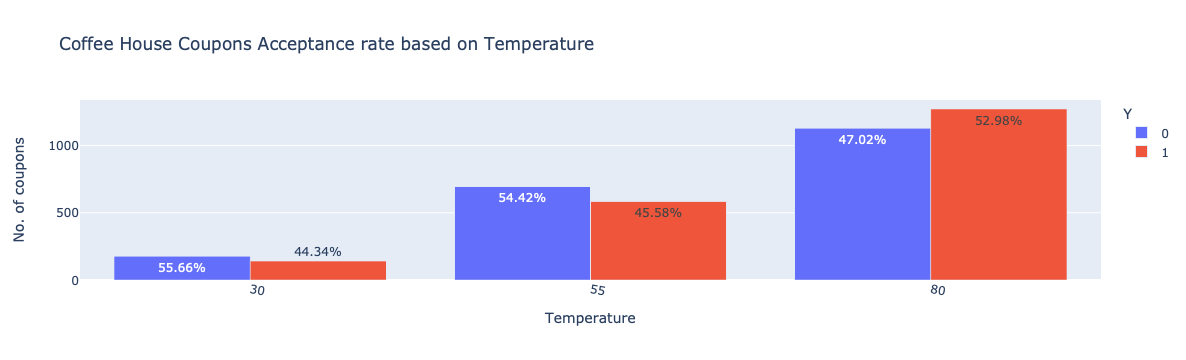

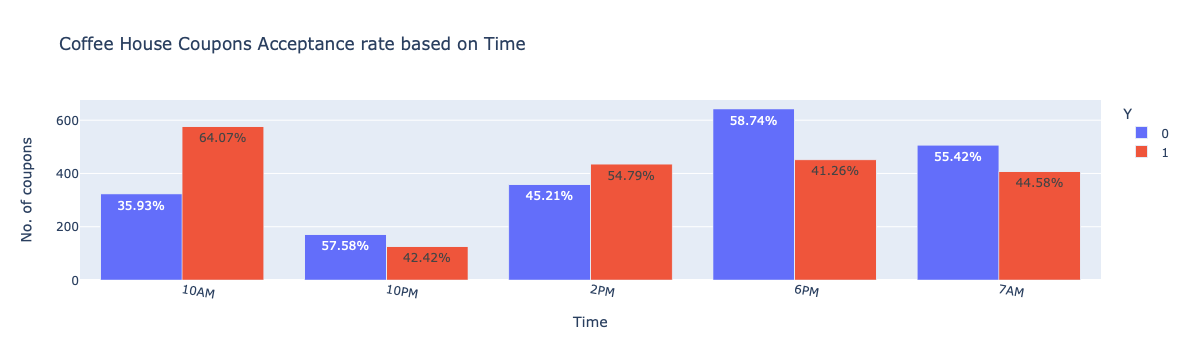

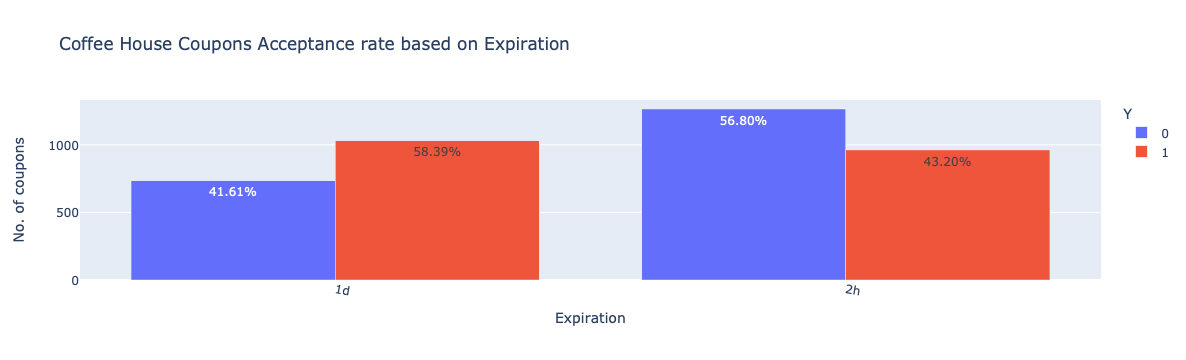

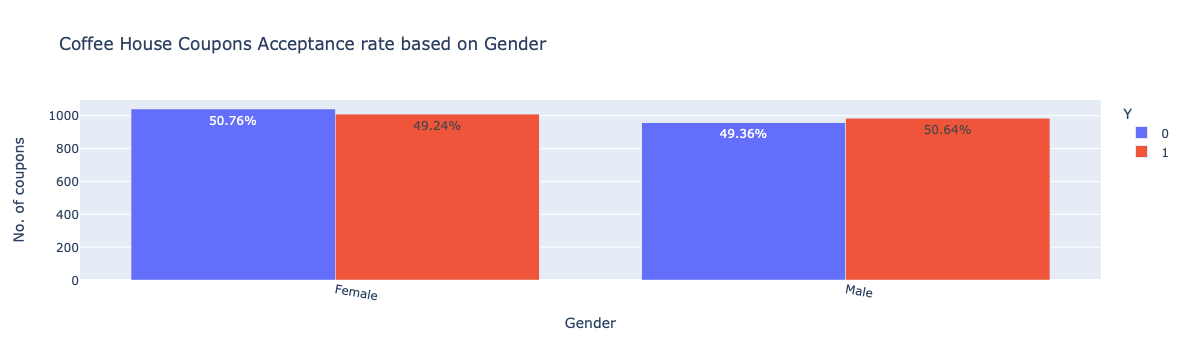

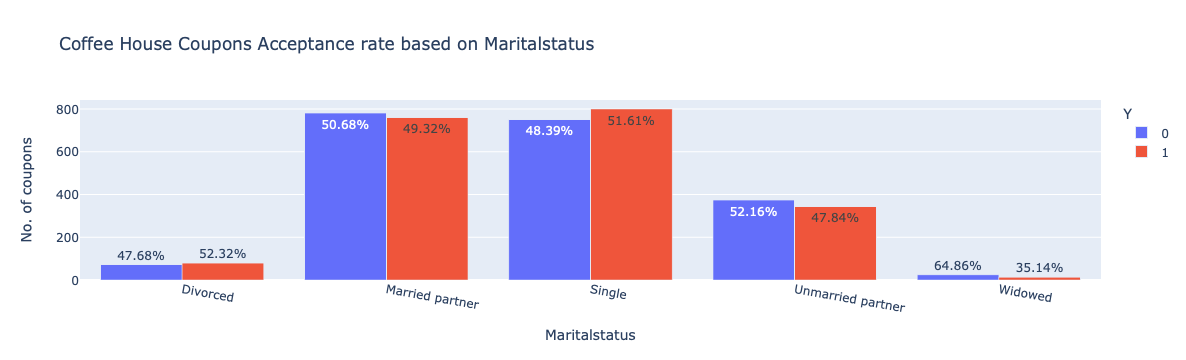

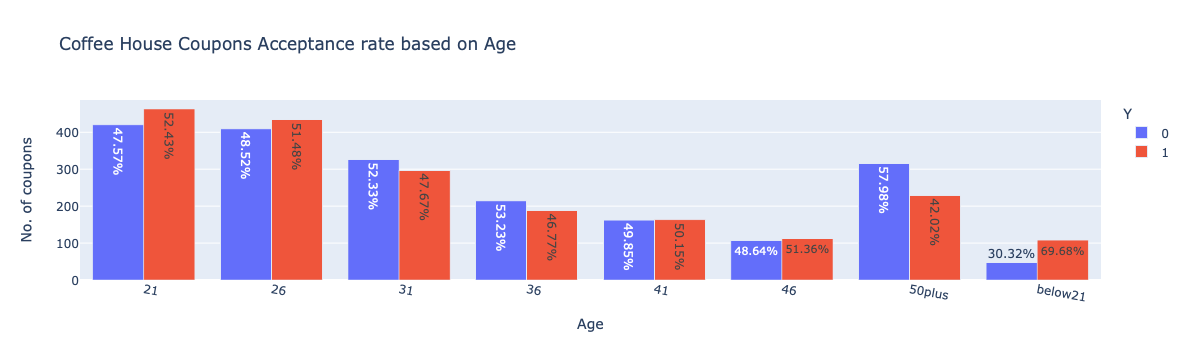

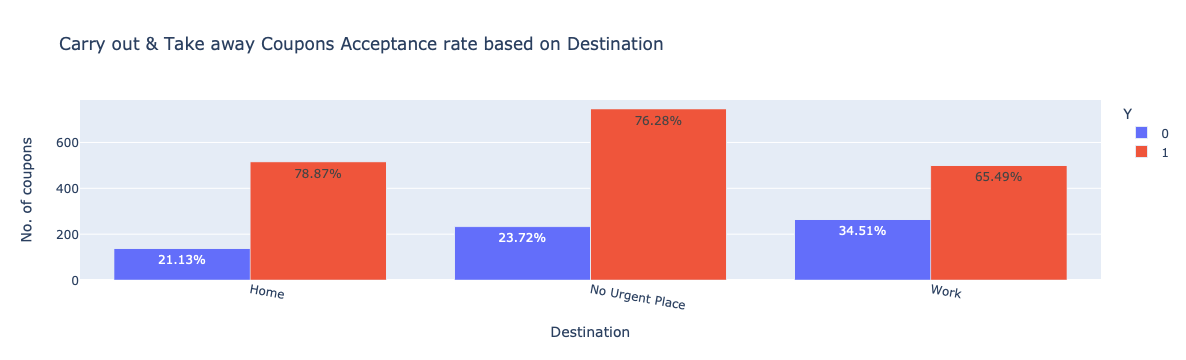

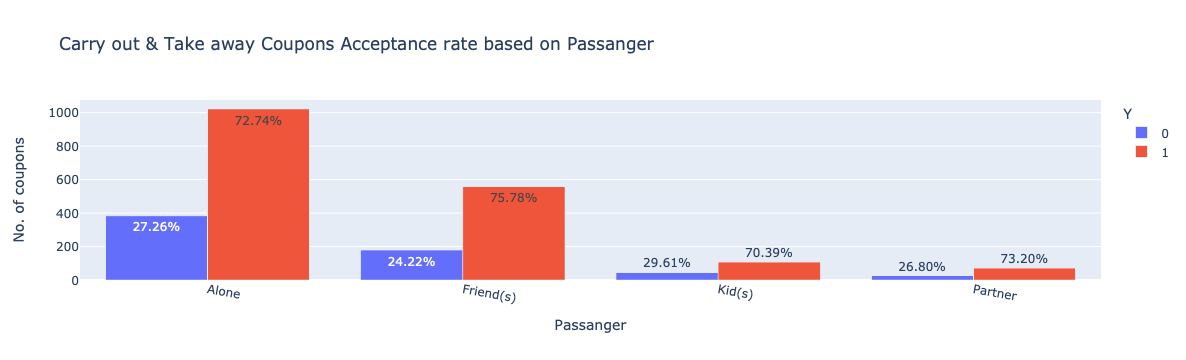

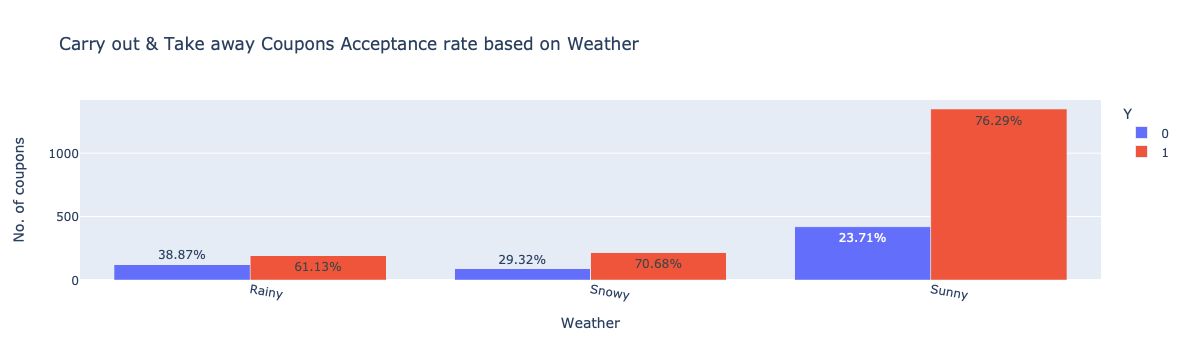

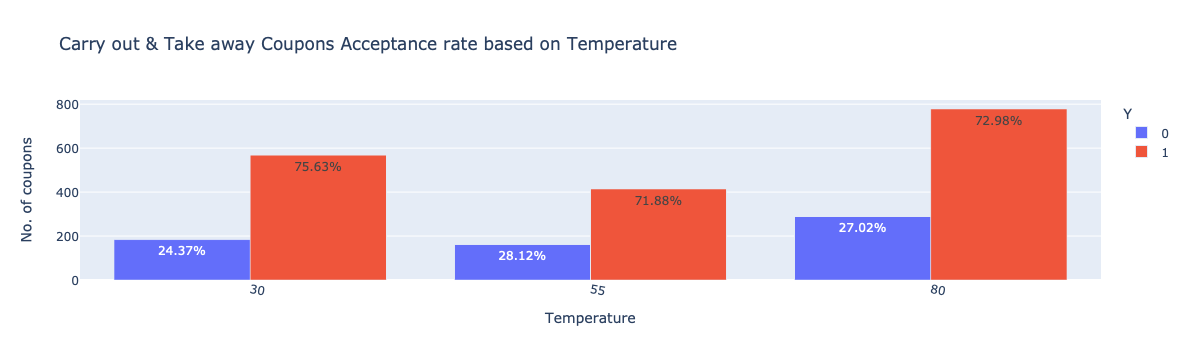

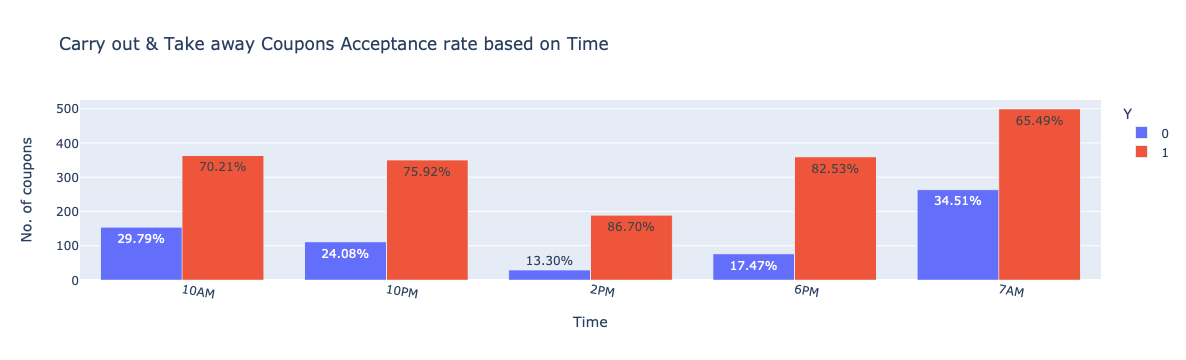

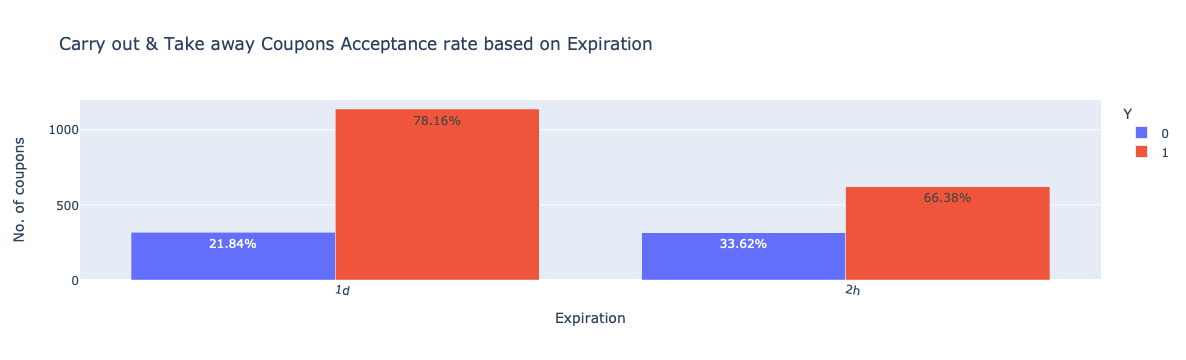

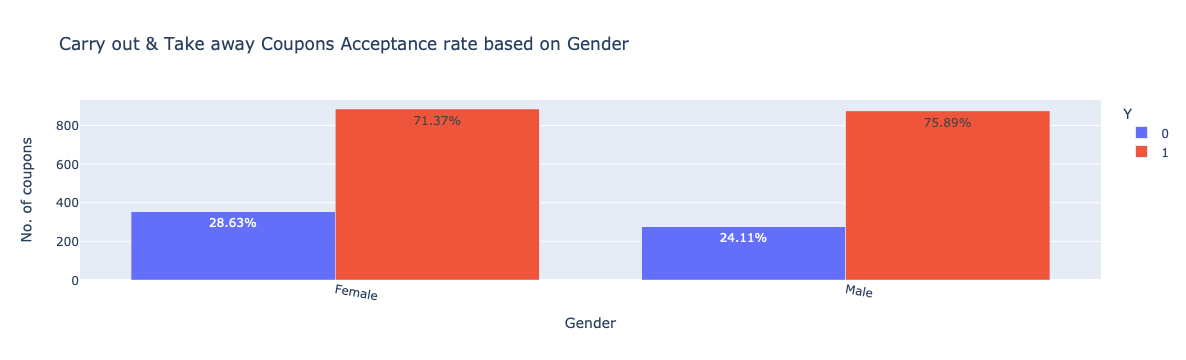

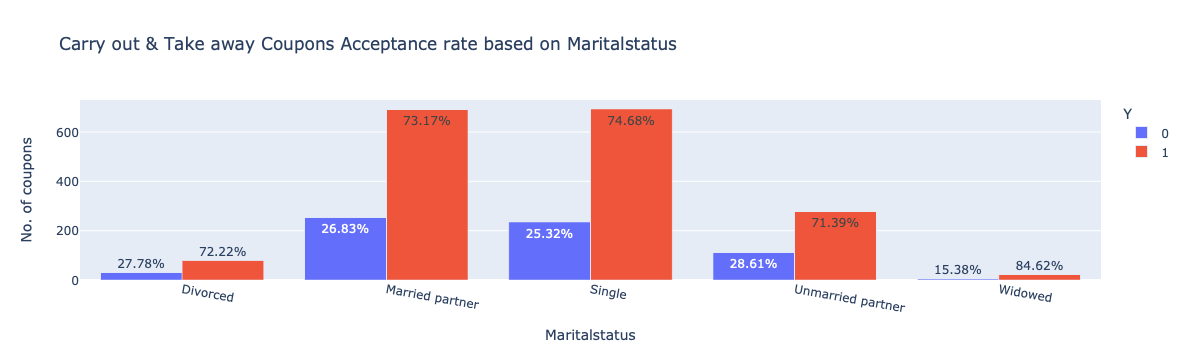

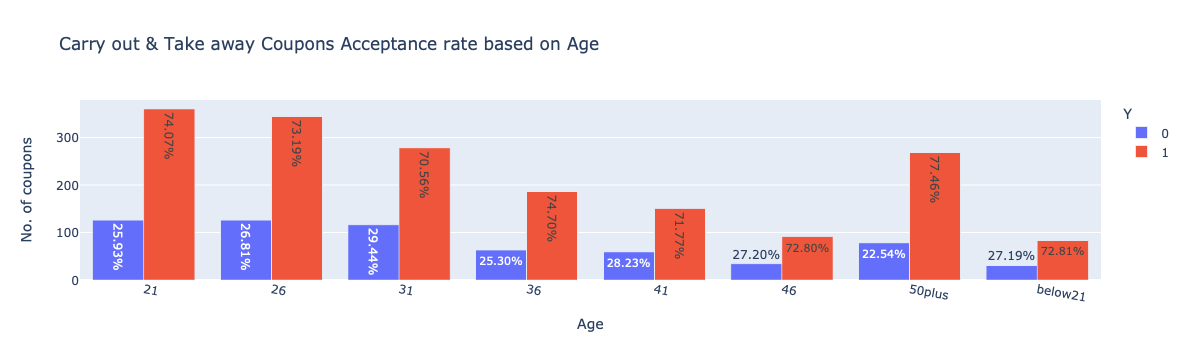

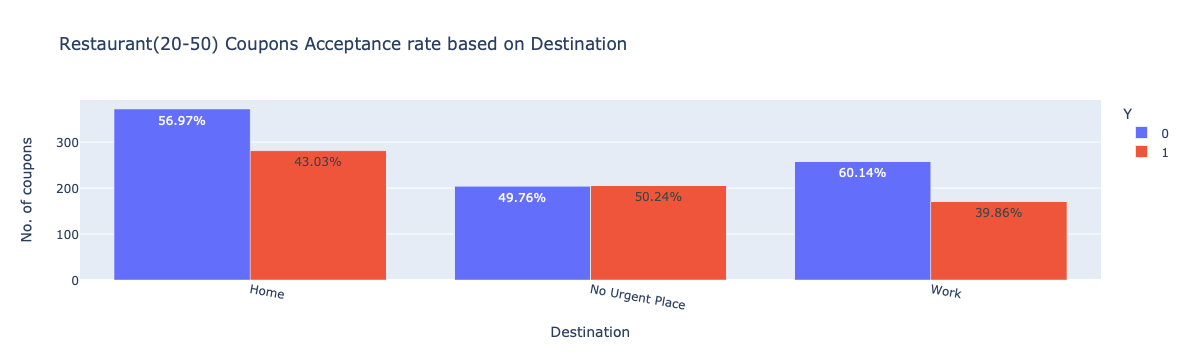

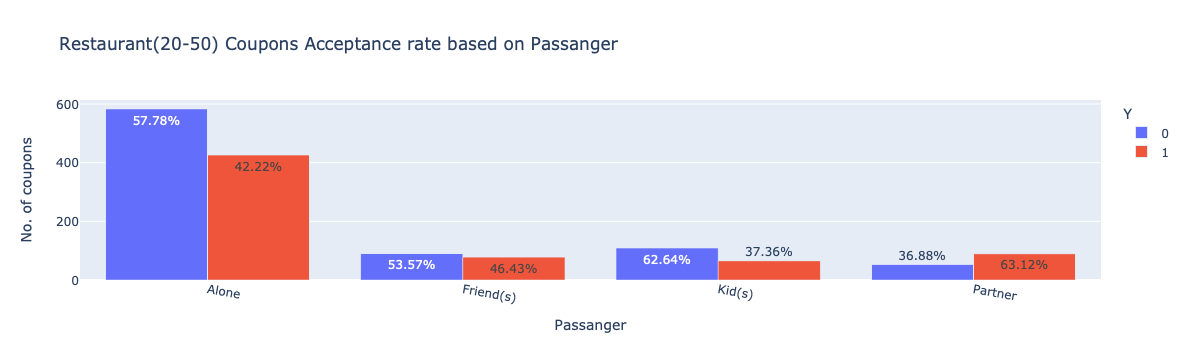

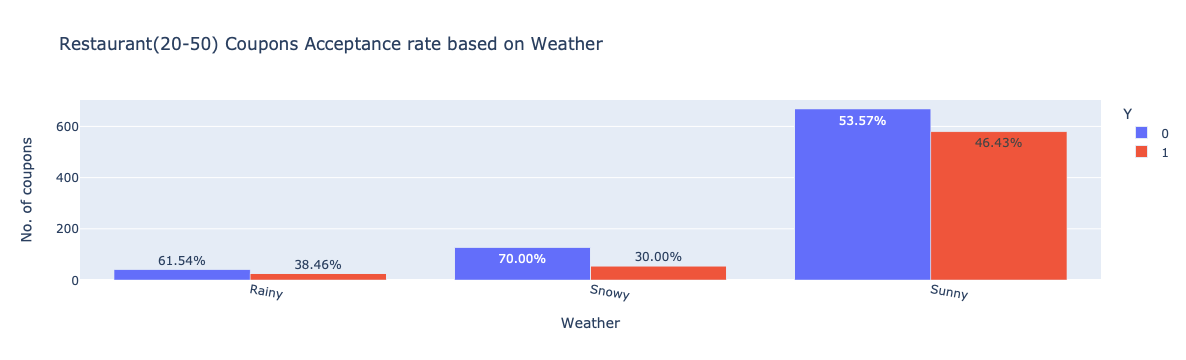

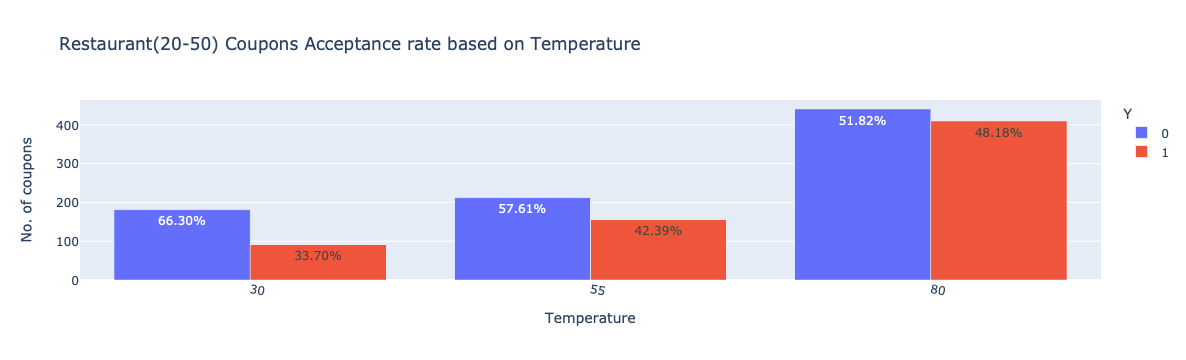

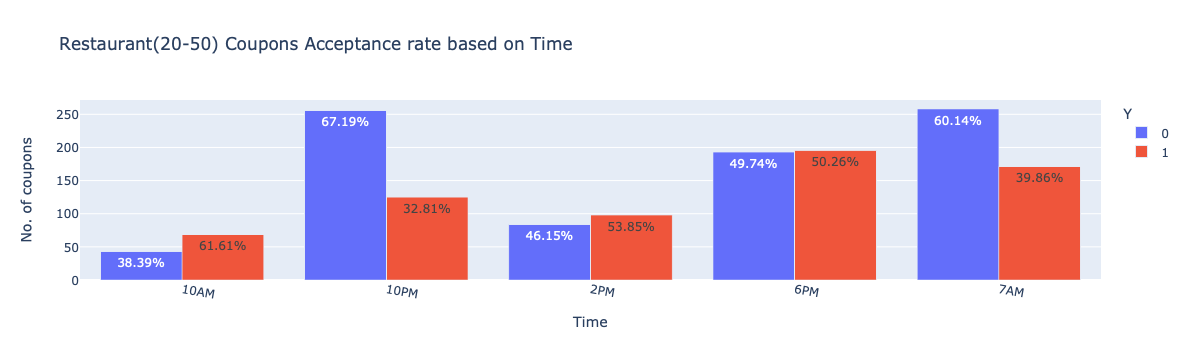

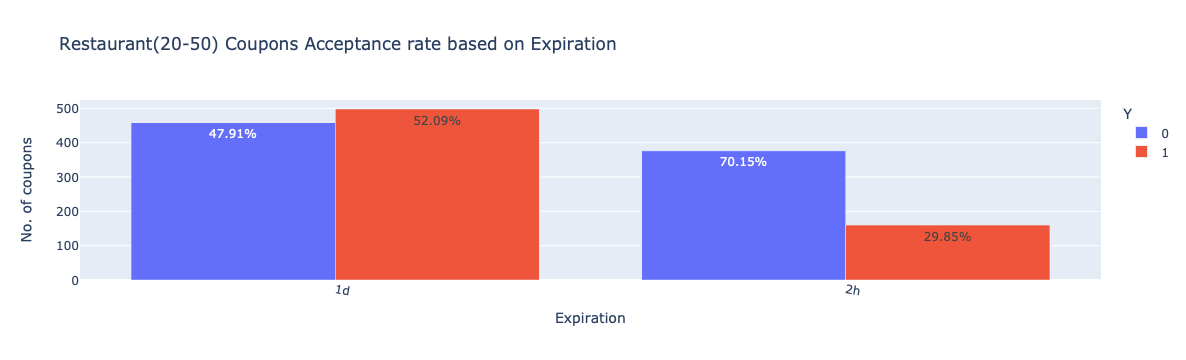

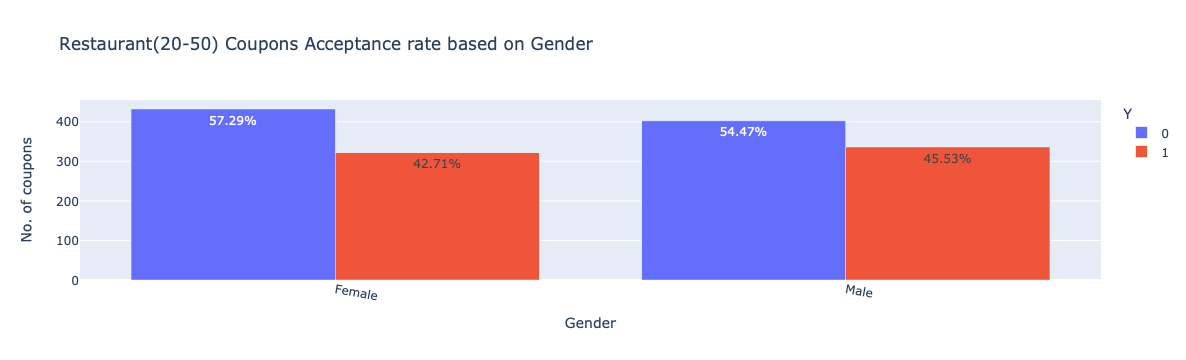

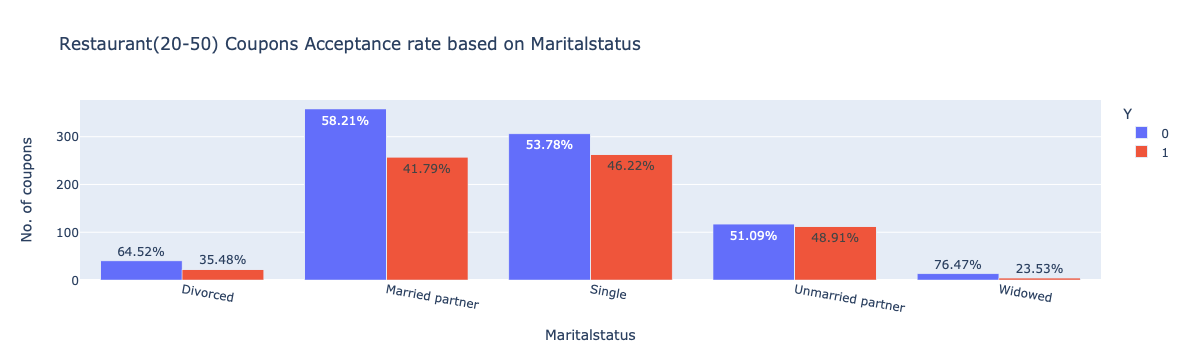

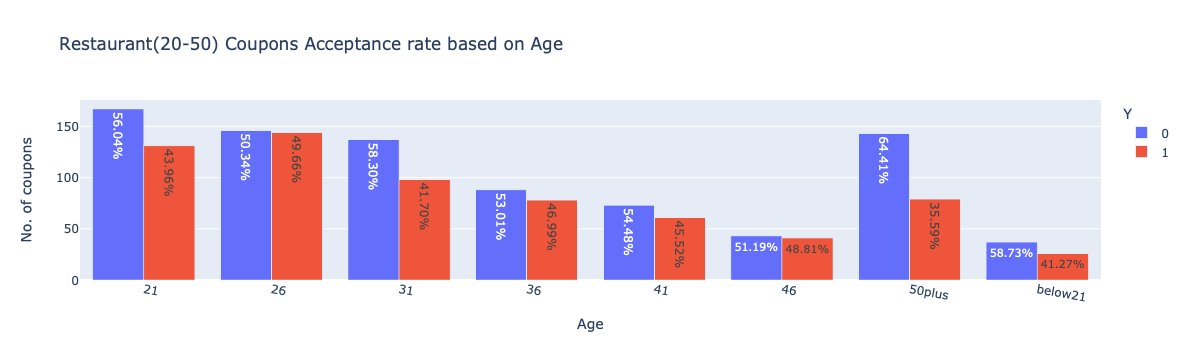

In [16]:
categories = [
    "destination",
    "passanger",
    "weather",
    "temperature",
    "time",
    "expiration",
    "gender",
    "maritalStatus",
    "age"
]

coupons = [
    "Restaurant(<20)",
    "Coffee House",
    "Carry out & Take away",
    "Restaurant(20-50)"
]
for coupon in coupons:
    coupon_data = data[data['coupon'] == coupon]
    for category in categories:
        title: str = (
            f"{coupon} Coupons Acceptance rate based on {category.title()}"
        )
        # This function is defined in cell #24
        plot_bar_column(category, coupon_data, title).show()

#### Findings for Restaurant(<20) coupon

* Driver going to "No urgent place" had higher Acceptance rate.
* Drivers with Friends, Partners, Kids had higher Acceptance rate.
* Sunny weather has higher Acceptance rate. Inline with this 55-80 degree temperate had higher acceptance rate.
* Coupons offered during 2PM-6PM had higher Acceptance rate.
* Coupon expiring in 1d had higher Acceptance rate whereas 2h has lower acceptance rate.
* Gender doesn't make difference. Acceptance rate is similar.
* Single, married/unmarried partner category has higher acceptance rate.
* Drivers who have Home and work as destination have similar acceptance rate.
* Finally, People who went to Restaurant(<20) atleast once had higher acceptance rate compared who went less than 1 or never.

#### Recommendations to drive Restaurant(<20) coupons.
Based on above observations, below are some of recommendations to help improve Acceptance rate.
* Present coupons to Drivers with passangers instead of Alone drivers. This drives up the acceptance rate.
* Target drivers who have gone to Cheap restaurant atleast 1 time in last 2 months. Greater the visit greater the Acceptance rate.
* Provide atleast 1d of coupon acceptance time to drive the acceptance rate high.
* Offer coupons between 2PM to 6PM or if driver is driving towards a non urgent place to drive acceptance rate high.
* Offer coupons during sunny weather. Colder the weather lower the acceptance rate.

**Similarly, plots for other coupons can be analysed and findings/recommendation can be provided**

### In following sections, i will be performing analysis on compelte coupons set and not individually

#### In this section i will be using Subburst Plot to see which combination has higher acceptance rate**

Multivariate analysis: Using ["destination", "passanger", "temperature", "expiration"] categories and Y will be used for color coding.


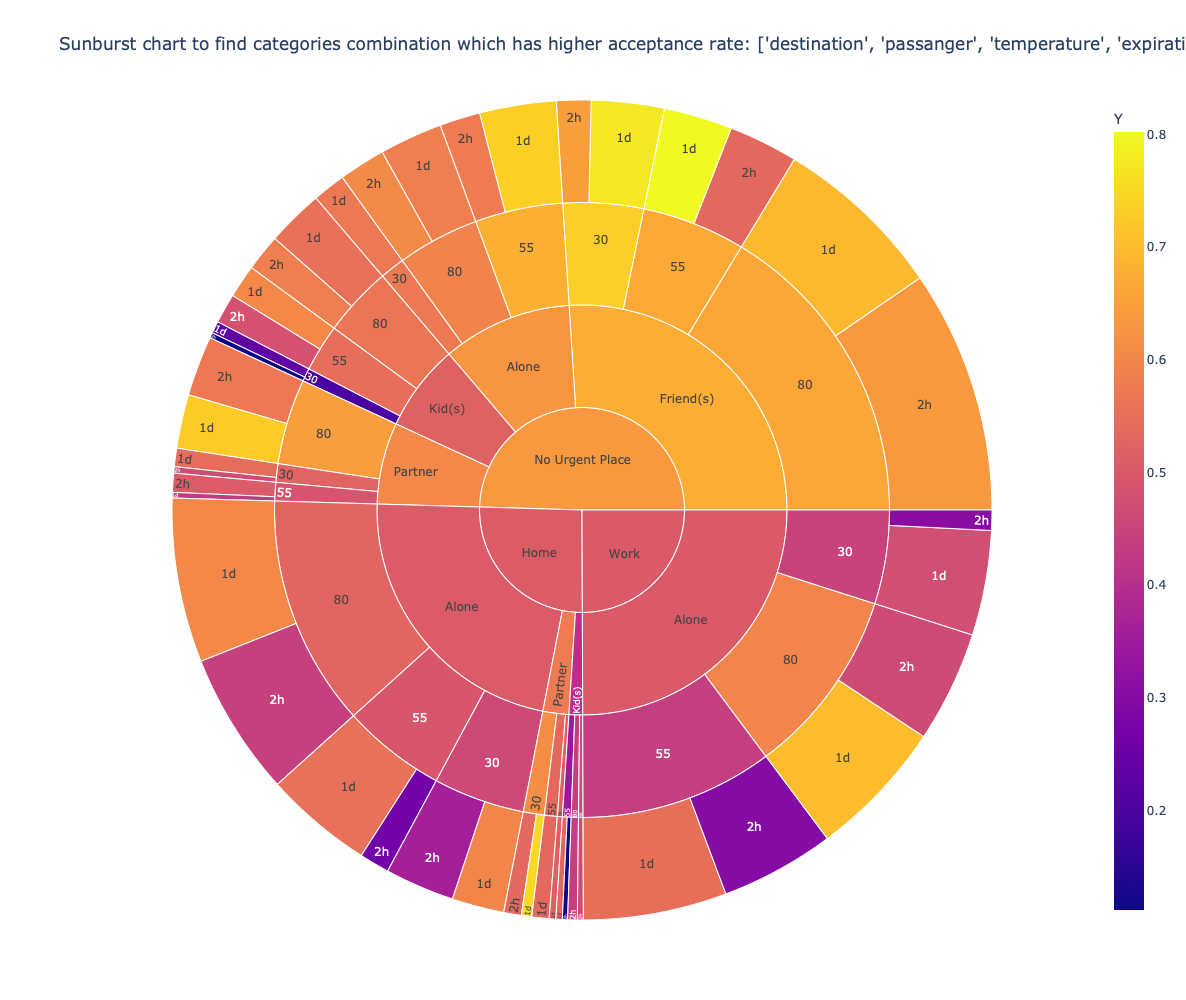

In [17]:
color_discrete_sequence = [
    '#FFAA00', '#2D5F91', '#819FBD', '#819FBD',
    '#91D4D2', '#96BEE6', '#C0D8F0','#E8655F',
    '#F1A39F', '#48B7B4']

categories = ["destination", "passanger", "temperature", "expiration"]
fig = px.sunburst(
    data,
    path=categories,
    title=("Sunburst chart to find categories combination "
           f"which has higher acceptance rate: {categories}"),
    color="Y",
    color_discrete_sequence=color_discrete_sequence,
    height=1000,
)

fig.show()

#### Findings
* Drivers going to "No urgent place" with friends, Sunny weather and coupons with 1d expiration have very high acceptance rate.
* Drivers going to "No urgent place" with Partner, Sunny weather and coupons with 1d expiration have very high acceptance rate.
* Drivers at Work, Alone and weather is sunny also has higher acceptance rate.
* Overall, drivers heading to "No urgent place" have more **orange/yellow spots** showing it has higher acceptance rate.

#### Recommendations
* Presenting coupon if atleast 2 of "No Urgent place", "Sunny", "Friends/Partner" conditions becomes true. This drives up the Acceptance rate.
* Presenting coupon to Alone driver helps driving Acceptance rate.


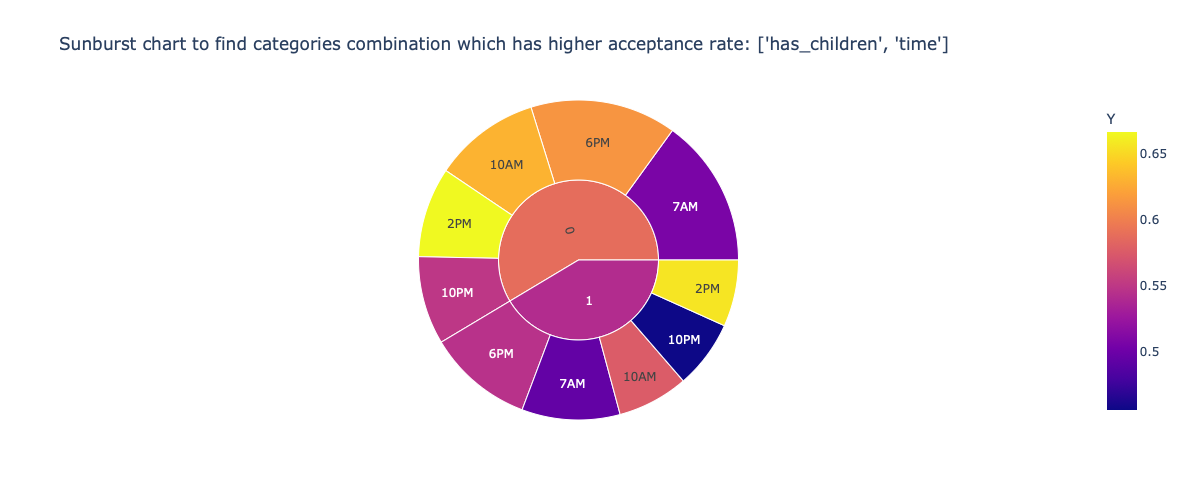

In [18]:
categories = ["has_children", "time"]

fig = px.sunburst(
    data,
    path=categories,
    title=("Sunburst chart to find categories combination "
           f"which has higher acceptance rate: {categories}"),
    color="Y",
    color_discrete_sequence=color_discrete_sequence,
    height=500,
)

fig.show()

#### Findings

* 10AM, 2PM, 6PM without children seem to have higher acceptance rate.
* 2PM with children also has higher acceptance rate.

#### Recommendation
* Present coupons to drivers at 10AM, 2PM and 6PM for higher Acceptance rate for drivers without children.
* Present coupons to drivers without childrens to drive Acceptance rate.

#### Analysis using "toCoupon_GEQ*" columns.

toCoupon_GEQ* columns are provided in dataset which represents the driving distance from driver's current location to Coupon accepting Bar/Restaurant/Coffee house.

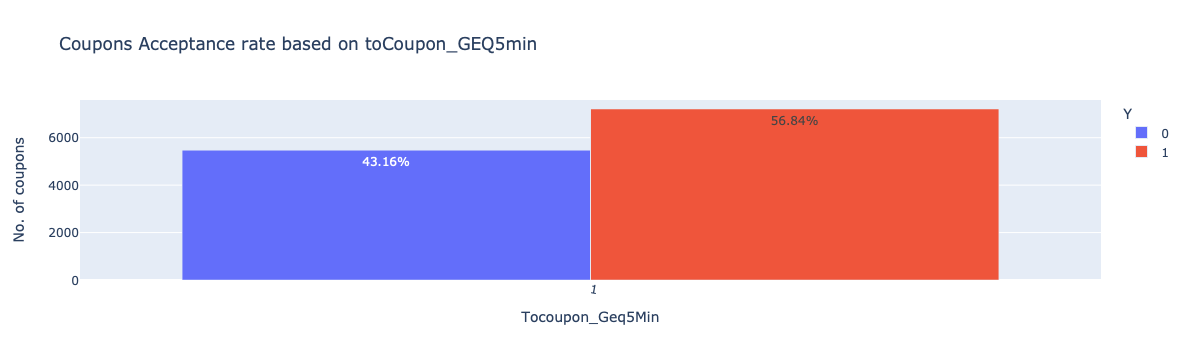

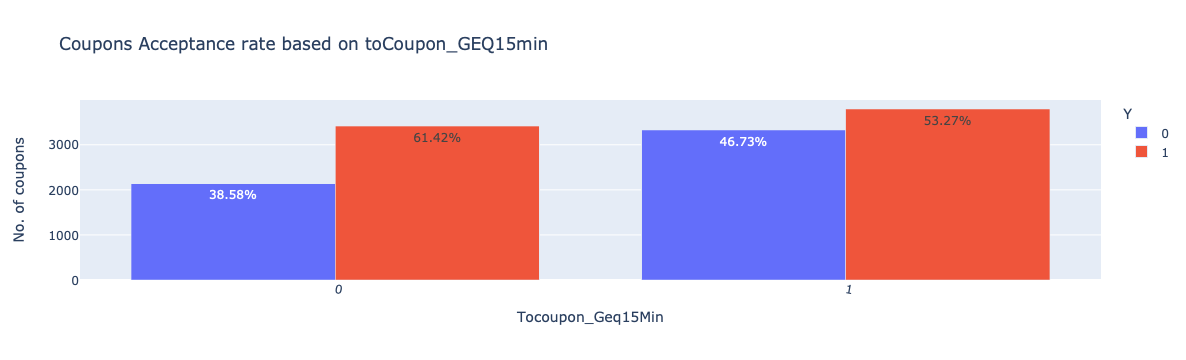

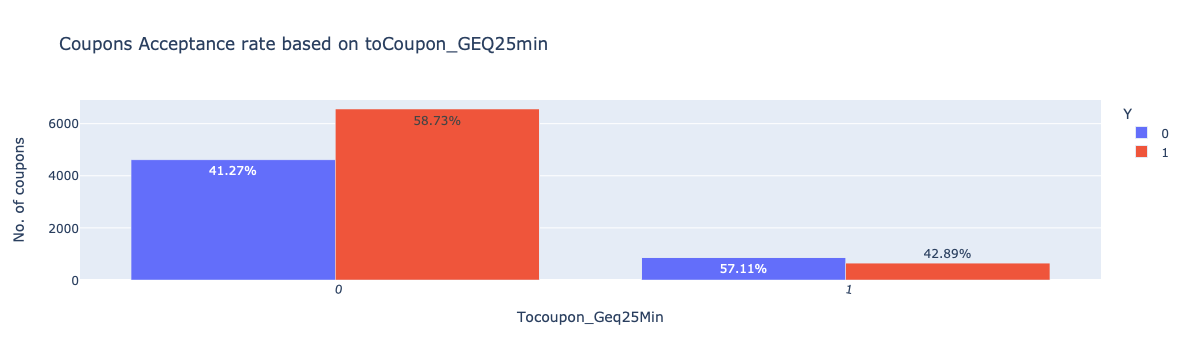

In [19]:
plot_bar_column(
    "toCoupon_GEQ5min",
    data,
    "Coupons Acceptance rate based on toCoupon_GEQ5min"
).show()

plot_bar_column(
    "toCoupon_GEQ15min",
    data,
    "Coupons Acceptance rate based on toCoupon_GEQ15min"
).show()

plot_bar_column(
    "toCoupon_GEQ25min",
    data,
    "Coupons Acceptance rate based on toCoupon_GEQ25min"
).show()

#### Below are some of observations and recommendations based on above plots

* We don't have any data for <5min driving distance.
* Acceptance rate is high when driving distance is less than 15min or 25min.
* Rejection rate is high when driving distance is greater than 25min.

#### Recommendations
* Present coupon to drivers who are less than 15min or 25min driving distance to Bar/Restaurant/Coffee house to drive Acceptance rate.
* Lesser the driving distance higher the acceptance rate.

### Analysis using "direction_same" and "direction_opp" columns.

direction_same and direction_opp columns are provided in dataset which represents the driving direction from driver's current location to Coupon accepting Bar/Restaurant/Coffee house.

In [20]:
same_dir_data = data[(data['direction_same'] == 1) & (data['direction_opp'] == 0)]
same_dir_data.shape

(2724, 28)

In [21]:
opp_dir_data = data[(data['direction_same'] == 0) & (data['direction_opp'] == 1)]
opp_dir_data.shape

(9960, 28)

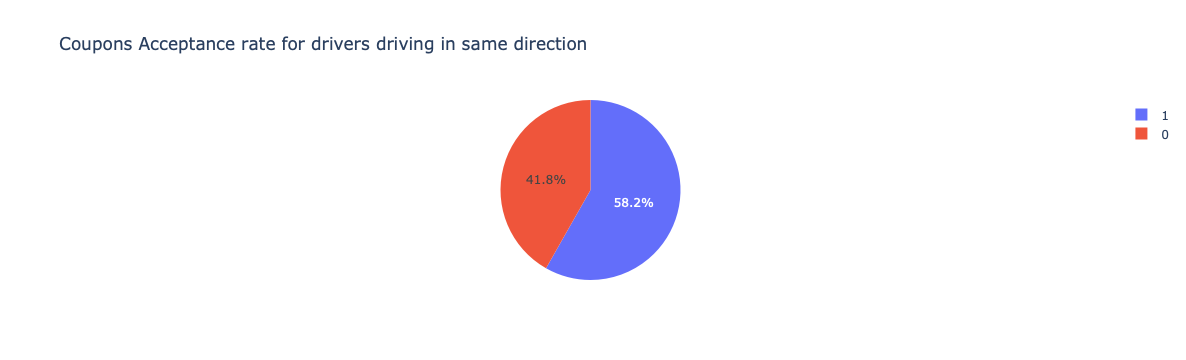

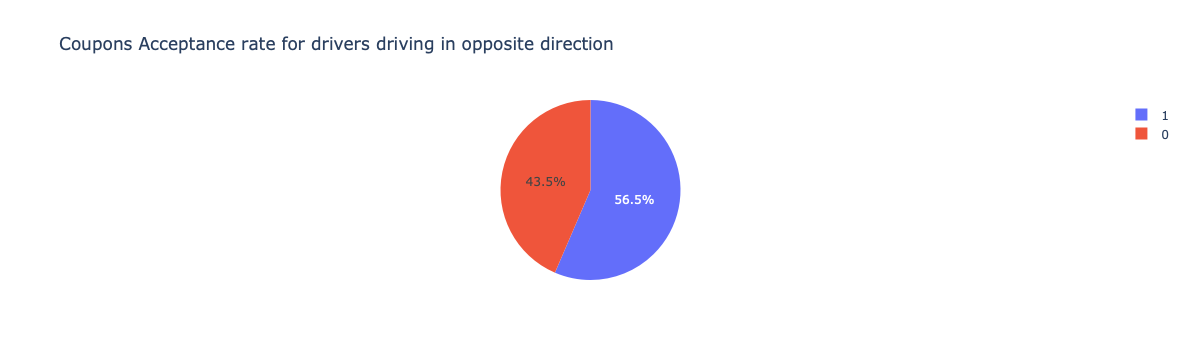

In [22]:
px.pie(
    same_dir_data,
    values='direction_same',
    names='Y',
    title='Coupons Acceptance rate for drivers driving in same direction'
).show()

px.pie(
    opp_dir_data,
    values='direction_opp',
    names='Y',
    title='Coupons Acceptance rate for drivers driving in opposite direction'
).show()

**Driving direction is not major deciding factor to drive Acceptance rate high based on above pie charts**

### What Percent of each coupon are purchased based on Education type?

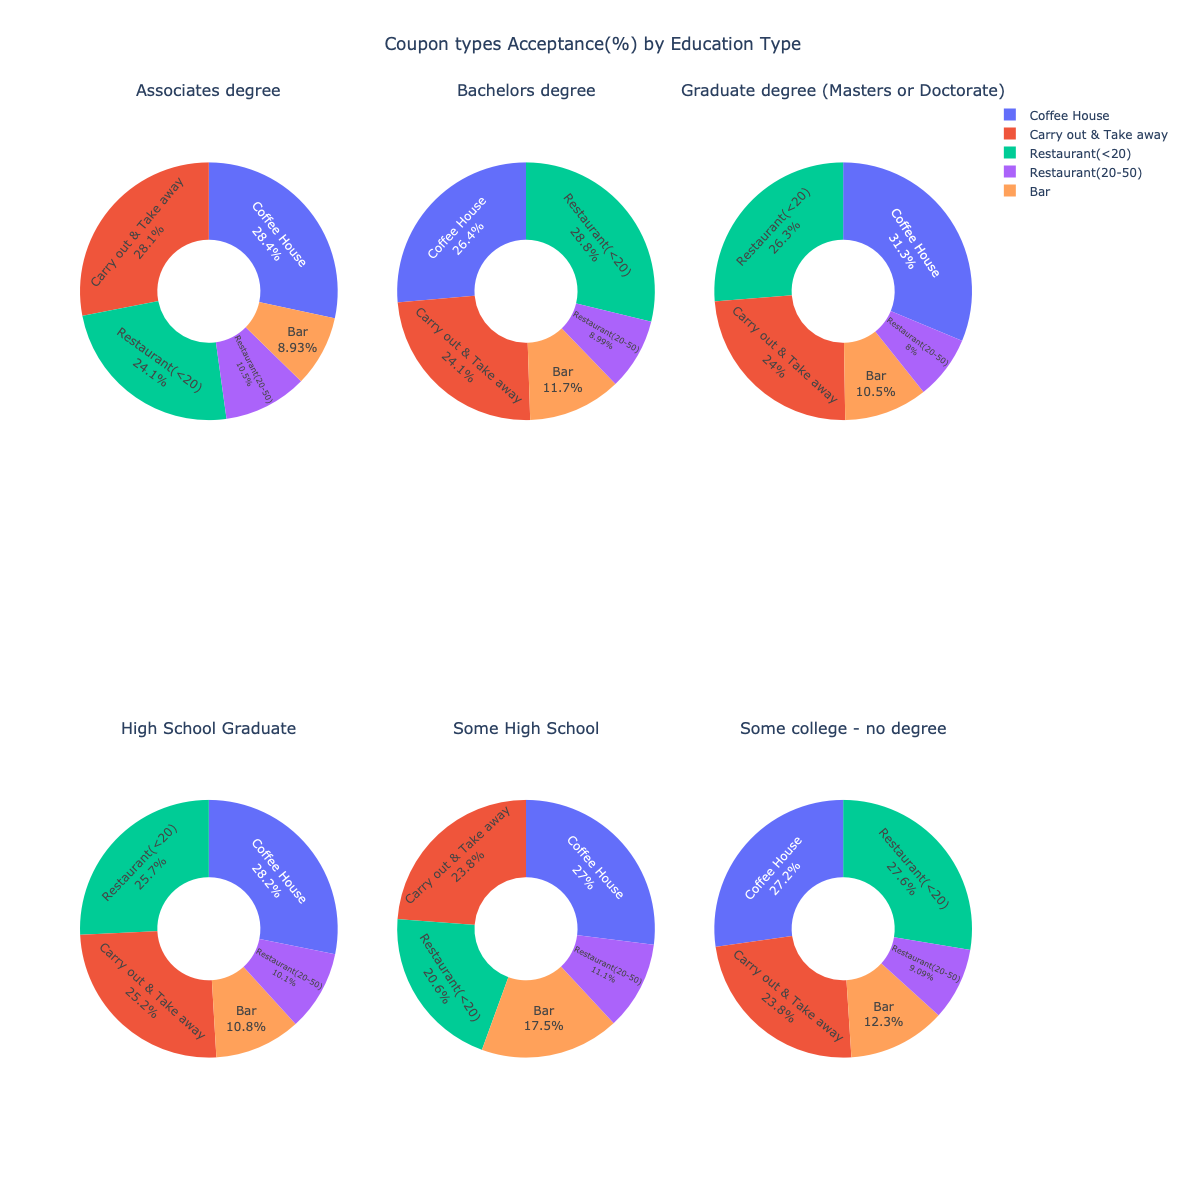

In [23]:
accepted_coupons_data = data[data['Y'] == 1]

# We want a subplot for every Education type
education_types = list(accepted_coupons_data.groupby('education'))

# Plot all graphs in 2 rows and 3 per columns.
# We have 6 education types in dataset
rows = 2
cols = 3

# Educatin type as subplot titles
subplot_titles = [l[0] for l in education_types]

# a compact and general version of what you did
specs = [[{'type':'domain'}] * cols] * rows

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=subplot_titles,
    specs=specs
)

for i, education_type in enumerate(education_types):
    row = i // cols + 1
    col = i % (rows + 1) + 1
    df = education_type[1]
    fig.add_trace(
        go.Pie(labels=df["coupon"],
               values=df["Y"],
               showlegend=True,
               textposition='inside',
               textinfo='label+percent',
               hole=0.4
              ),
         row=row,
         col=col
    
    )

fig.update_layout(
    title="Coupon types Acceptance(%) by Education Type",
    title_x=0.5,
    autosize=False,
    width=1200,
    height=1200
)
fig.show()

**Restaurant(<20), Coffee House, Carry out & Take away coupons constitute majority of coupons purchased for all education categories.**
So Education may not be a major driving factor to increase Acceptance rate!

Dataset is equally distributed.

#### Which age group accept more coupon?

In this section i have used seaborn.

<Axes: xlabel='age', ylabel='Y'>

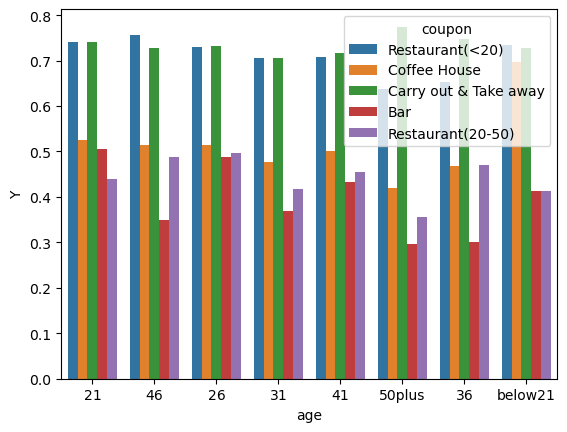

In [24]:
sns.barplot(data=data, x="age", y="Y", hue='coupon', errorbar=None)

#### Findings
* 50plus tend to reject more of Bar coupon. Which is inline due to health reasons!
* below21 age groups have accepted more coffee coupons.

#### Recommendations
* Deliver more coffee coupons to below 21 age group
* Present more Bar coupons to lower age groups
* Cheap restaurants and Carry out & Take away coupons acceptance rate is high for all age groups so keep them coming.

#### Finally trying to see covariance matrix to find other findings

In [25]:
# Covariance matrix
data.cov(numeric_only=True)

temperature  has_children  toCoupon_GEQ5min  \
temperature          366.894325     -0.186024               0.0   
has_children          -0.186024      0.242648               0.0   
toCoupon_GEQ5min       0.000000      0.000000               0.0   
toCoupon_GEQ15min     -1.476417      0.019118               0.0   
toCoupon_GEQ25min     -1.341876     -0.002190               0.0   
direction_same         0.763692     -0.006397               0.0   
direction_opp         -0.763692      0.006397               0.0   
Y                      0.581017     -0.011115               0.0   
actual_age            -4.262854      2.627769               0.0   
actual_income     -18711.627350   1401.442299               0.0   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -1.476417          -1.341876        0.763692   
has_children                0.019118          -0.002190       -0.006397   
toCoupon_GEQ5min            0.000000           0.000000        0.000000   
toCoupon_GEQ15min           0.246238           0.052242       -0.061855   
toCoupon_GEQ25min           0.052242           0.104944       -0.025585   
direction_same             -0.061855          -0.025585        0.168651   
direction_opp               0.061855           0.025585       -0.168651   
Y                          -0.020057          -0.016629        0.002964   
actual_age                  0.213436          -0.008316       -0.149122   
actual_income             298.524787         -51.326704     -306.819758   

                   direction_opp           Y    actual_age  actual_income  
temperature            -0.763692    0.581017     -4.262854  -1.871163e+04  
has_children            0.006397   -0.011115      2.627769   1.401442e+03  
toCoupon_GEQ5min        0.000000    0.000000      0.000000   0.000000e+00  
toCoupon_GEQ15min       0.061855   -0.020057      0.213436   2.985248e+02  
toCoupon_GEQ25min       0.025585   -0.016629     -0.008316  -5.132670e+01  
direction_same         -0.168651    0.002964     -0.149122  -3.068198e+02  
direction_opp           0.168651   -0.002964      0.149122   3.068198e+02  
Y                      -0.002964    0.245336     -0.381536  -4.177168e+02  
actual_age              0.149122   -0.381536    172.553433   2.633833e+04  
actual_income         306.819758 -417.716797  26338.326314   1.081931e+09

#### Findings

* direction_same and direction_opp have same covariance so this is inline with my finding above that driving direction doesn't affect coupon acceptance.
* toCoupon_GEQ5min  has covariance 0 since all data points are 1. This means all restaurants are atleast 5min away.
* Temperature affects the Coupon acceptance rate

### Recommendations and Next steps

#### Recommendations
Below are some of important Recommendation i could come up with this Analysis to drive Acceptance rate.

* Present respective coupons to driver who have gone to that particular place atleast once or more then that. For example, present a Bar coupon only if that driver has gone to Bar atleast once.
* Present coupons to Driver going to "No urgent place". Drivers driving to work are less inclined towards accepting a coupon.
* Present coupons to Driver with Passengers like Friends, Kid or Partner. Alone Driver tend to reject the coupon more and passanger can influence more on accepting the coupon.
* Provide atlease 1d expiration duration to increase acceptance rate.
* Provide lower expiration duration if driving distance is <5min.
* Cheap restaurants and Carry out & Take away coupons acceptance rate is high for all age groups so keep them coming.
* Present more Bar coupons to lower age groups
* Deliver more coffee coupons to below 21 age group. College going students tend to use them along with cheap restaurants.


These are some of important recommendations.

#### Next Steps

* Dig through other categorical columns and derive more findings and recommendations
* Apply ML models to come up with a Recommendation Engine as i learn through this Awesome course. Looking forward to this.